# Preparation

In [80]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from google.colab import drive

In [81]:
drive.mount('/content/drive')
home_dir = "/content/drive/My Drive/Colab Notebooks/hackaton/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
df = pd.read_csv(home_dir+'data.csv')

In [83]:
df.shape

(5432000, 15)

In [84]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Data Description

## Information

In [85]:
display(df.info())
display(df.head(5))
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424851 entries, 0 to 5431986
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   deactivated       21875 non-null   object
 1   country           424851 non-null  object
 2   city              424851 non-null  object
 3   about             84981 non-null   object
 4   activities        86439 non-null   object
 5   books             73225 non-null   object
 6   games             69470 non-null   object
 7   interests         97145 non-null   object
 8   education_form    127282 non-null  object
 9   education_status  82178 non-null   object
 10  university        424851 non-null  int64 
 11  university_name   254657 non-null  object
 12  faculty           424851 non-null  int64 
 13  faculty_name      205541 non-null  object
 14  graduation        424851 non-null  int64 
dtypes: int64(3), object(12)
memory usage: 51.9+ MB


None

,deactivated,country,city,about,activities,books,games,interests,education_form,education_status,university,university_name,faculty,faculty_name,graduation
0,NaN,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",NaN,NaN,"Владимир Кунин : ""Интер девочка"", ""Иванов и Ра...",CS,NaN,Очное отделение,Студент (специалист),56,СПбПУ Петра Великого (Политех),2157469,Технической кибернетики\r\n,2010
1,NaN,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
5,deleted,"{'id': 0, 'title': ''}","{'id': 0, 'title': ''}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
6,banned,"{'id': 0, 'title': ''}","{'id': 74, 'title': 'Курган'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
9,NaN,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",Мама Люба\n,Несу людям счастье и калории,"Акунин, Бунин, Достоевский",Догонялки,"шоппинг, Даник, кулинария",Очное отделение,Студентка (бакалавр),1,СПбГУ,9,Международных отношений,2010


,deactivated,country,city,about,activities,books,games,interests,education_form,education_status,university,university_name,faculty,faculty_name,graduation
1698683,NaN,"{'id': 1, 'title': 'Россия'}","{'id': 11988, 'title': 'Сергач'}",NaN,NaN,конечно гарри поттер,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
1468513,NaN,"{'id': 2, 'title': 'Украина'}","{'id': 314, 'title': 'Киев'}",не люблю о себе рассказывать,NaN,NaN,NaN,очень много,NaN,NaN,0,NaN,0,NaN,0
915753,NaN,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",NaN,NaN,NaN,NaN,NaN,Очно-заочное отделение,NaN,1173072,СПбГЭУ,0,NaN,1971
447308,NaN,"{'id': 1, 'title': 'Россия'}","{'id': 57, 'title': 'Иркутск'}",NaN,NaN,NaN,NaN,NaN,NaN,Студентка (специалист),504,БГУ,24639,Ускоренного обучения,0
3895123,NaN,"{'id': 1, 'title': 'Россия'}","{'id': 0, 'title': ''}",Многодетная Мама в 24.\nЭпилепсик с 3х лет.\nС...,"Смм специалист, продвижение Польза",Рай и Ад,NaN,Ислам психология,NaN,NaN,77903,КФ ЮФУ,0,NaN,0


## Numerical And Categorical Features

In [86]:
def split_features(df):
    cat_cols = []
    num_cols = []

    for col_name in df.columns:
        if df[col_name].dtypes == object:
            cat_cols.append(col_name)
        else:
            num_cols.append(col_name)

    return num_cols, cat_cols

In [87]:
num_cols, cat_cols = split_features(df)

print(num_cols)
print(cat_cols)

['university', 'faculty', 'graduation']
['deactivated', 'country', 'city', 'about', 'activities', 'books', 'games', 'interests', 'education_form', 'education_status', 'university_name', 'faculty_name']


## Basic Statistics

In [88]:
display(df[num_cols].describe().transpose())
display(df[cat_cols].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
university,424851.0,146312.025030,3.298476e+05,0.0,0.0,550.0,34039.0,3.283066e+06
faculty,424851.0,368214.220732,7.460079e+05,0.0,0.0,0.0,126803.0,3.283066e+06
graduation,424851.0,5894.622275,2.139617e+06,0.0,0.0,0.0,2009.0,1.306097e+09


,count,unique,top,freq
deactivated,21875,2,deleted,11830
country,424851,240,"{'id': 1, 'title': 'Россия'}",195467
city,424851,42280,"{'id': 0, 'title': ''}",51203
about,84981,76937,...,226
activities,86439,63295,работаю,532
books,73225,49073,нет,898
games,69470,44162,нет,690
interests,97145,75552,Спорт,685
education_form,127282,5,Очное отделение,77171
education_status,82178,26,Выпускница (специалист),12913


## Correlation

In [89]:
def display_stylized_df(df: pd.DataFrame, transposed=False, cmap='Greens'):
    if transposed:
        display(df.transpose().style.background_gradient(cmap=cmap, axis=1))
    else:
        display(df.style.background_gradient(cmap=cmap))


In [90]:
cmap = sns.color_palette("Greens", as_cmap=True)

In [91]:
display_stylized_df(df[num_cols].corr(), cmap=cmap)

,university,faculty,graduation
university,1.000000,0.513813,0.004225
faculty,0.513813,1.000000,-0.001026
graduation,0.004225,-0.001026,1.000000


## Missing Data

In [92]:
def get_nulls_by_cols(df: pd.DataFrame):
    nan_vals = df.isna().sum().to_frame().rename(columns={0: 'missing'})
    nan_vals = nan_vals[nan_vals['missing'] != 0].sort_values(
        'missing', ascending=False)
    nan_vals['%'] = (nan_vals['missing']/df.shape[0]*100).round(2)

    return nan_vals

def show_plots_of_nulls(df, nan_vals):
    fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
    fig.suptitle('Missing Values By Columns')

    barplot = sns.barplot(
        data=nan_vals,
        x=nan_vals.index,
        y='missing',
        palette='Greens_r',
        ax=axes[0]
    )
    barplot.tick_params(axis='x', rotation=45)

    heatmap = sns.heatmap(
        df[nan_vals.index].isna(),
        cmap='Greens',
        ax=axes[1]
    )
    heatmap.tick_params(axis='x', rotation=45)

,deactivated,games,books,education_status,about,activities,interests,education_form,faculty_name,university_name
missing,402976.000000,355381.000000,351626.000000,342673.000000,339870.000000,338412.000000,327706.000000,297569.000000,219310.000000,170194.000000
%,94.850000,83.650000,82.760000,80.660000,80.000000,79.650000,77.130000,70.040000,51.620000,40.060000


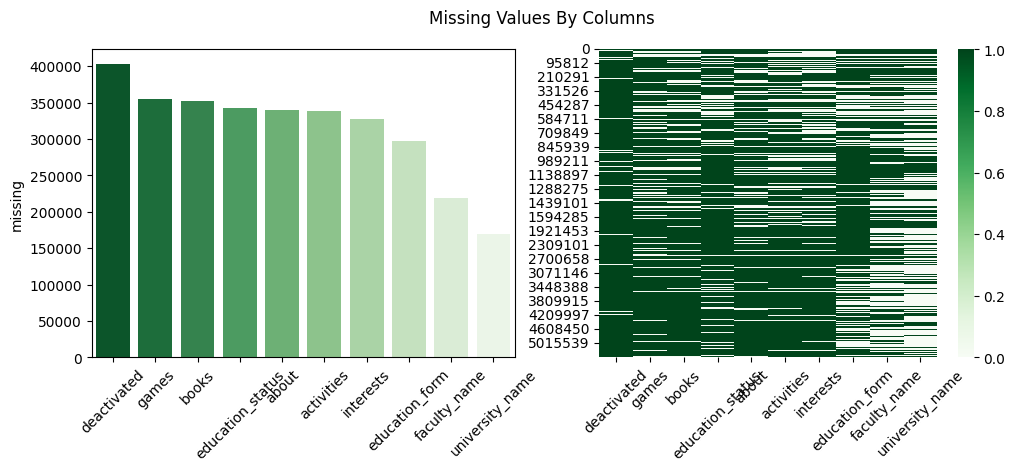

In [93]:
nan_vals = get_nulls_by_cols(df)
display_stylized_df(nan_vals, True)
show_plots_of_nulls(df, nan_vals)

## Values Analysis

### Numerical

In [94]:
def show_boxplots(df, num_cols, width, figsize):
    height = int(np.ceil(len(num_cols)/width))
    fig, axes = plt.subplots(nrows=height, ncols=width, figsize=figsize)

    for idx, col_name in enumerate(num_cols):
        plt.subplot(height, width, idx+1)
        sns.boxplot(data=df, x=col_name, orient='h', palette='Greens')

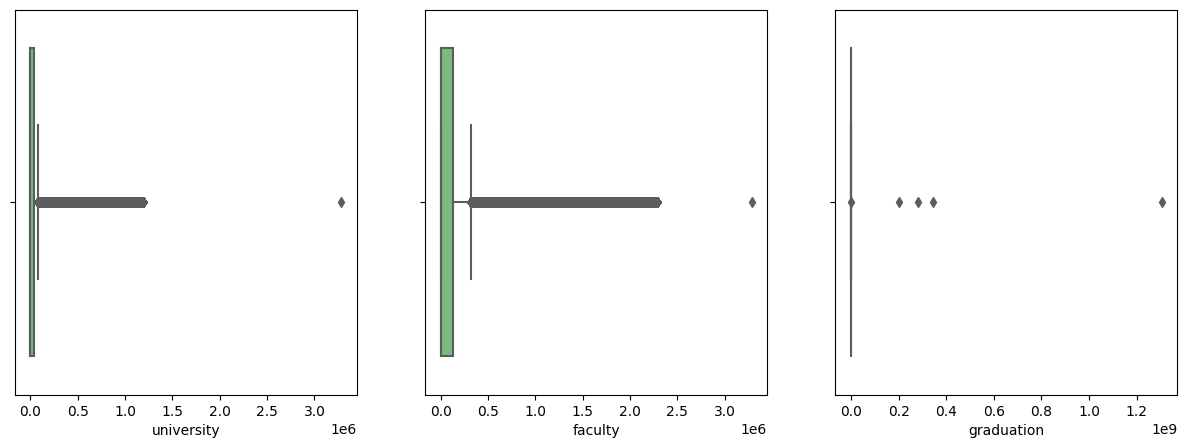

In [95]:
show_boxplots(df, num_cols, 3, (15, 5))

### Categorical

In [96]:
df_cities_counts = df.groupby(['country', 'city'], as_index=False).size().sort_values('size', ascending=False).iloc[:20, :]
df_cities_counts

,country,city,size
1,"{'id': 0, 'title': ''}","{'id': 0, 'title': ''}",31135
16555,"{'id': 1, 'title': 'Россия'}","{'id': 1, 'title': 'Москва'}",30491
29068,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",14168
16554,"{'id': 1, 'title': 'Россия'}","{'id': 0, 'title': ''}",11078
40481,"{'id': 2, 'title': 'Украина'}","{'id': 314, 'title': 'Киев'}",8134
29852,"{'id': 1, 'title': 'Россия'}","{'id': 49, 'title': 'Екатеринбург'}",4227
31209,"{'id': 1, 'title': 'Россия'}","{'id': 99, 'title': 'Новосибирск'}",3818
44110,"{'id': 3, 'title': 'Беларусь'}","{'id': 282, 'title': 'Минск'}",3755
30529,"{'id': 1, 'title': 'Россия'}","{'id': 60, 'title': 'Казань'}",3577
45366,"{'id': 4, 'title': 'Казахстан'}","{'id': 183, 'title': 'Алматы'}",3419


In [97]:
df_faculties_counts = df.groupby(['university_name', 'faculty_name'], as_index=False).size().sort_values('size', ascending=False).iloc[:20, :]
df_faculties_counts

,university_name,faculty_name,size
34557,МГУ,Высшая школа бизнеса,931
34551,МГУ,Биоинженерии и биоинформатики,564
34609,МГУ,Факультет биоинженерии и биоинформатики,429
34552,МГУ,Биологический,295
34575,МГУ,Журналистики,246
25307,ГУМФ (бывш. АБИК),Финансовый,240
30800,КПИ им. И. Сикорского,Информатики и вычислительной техники,203
34553,МГУ,Биологический факультет,199
34646,МГУ,Юридический,169
30808,КПИ им. И. Сикорского,Приборостроительный,166


In [98]:
def plot_treemap(df: pd.DataFrame, cols: list, values: str):
    fig = px.treemap(
        data_frame=df,
        values=values,
        path=cols,
        height=1000,
        width=1500
    )

    fig.show()

In [99]:
plot_treemap(df_faculties_counts, ['university_name', 'faculty_name'], 'size')

In [100]:
df['education_status'].value_counts()

Выпускница (специалист)    12913
Выпускник (специалист)     10545
Студент (специалист)       10201
Студентка (специалист)      8074
Студент (бакалавр)          6223
Абитуриент                  4610
Студентка (бакалавр)        4424
Выпускник (магистр)         3801
Выпускник (бакалавр)        3663
Выпускница (бакалавр)       2776
Выпускница (магистр)        2636
Доктор наук                 2530
Студент (магистр)           2491
Абитуриентка                2224
Кандидат наук               1372
Студентка (магистр)         1196
Аспирант                    1134
Аспирантка                   471
Докторант                    177
Адъюнкт                      167
Интерн                       166
Ассистент-стажёр             142
Клинический ординатор        113
Соискатель                    72
Соискательница                46
Исследователь                 11
Name: education_status, dtype: int64

In [101]:
df['deactivated'].value_counts()

deleted    11830
banned     10045
Name: deactivated, dtype: int64

# Data Manipulation

In [102]:
df_copy = df.copy()

## Removing Deleted And Deactivated Accounts

In [103]:
mask_deactivated = (df_copy['deactivated'] == 'banned') | (df_copy['deactivated'] == 'deleted')
df_copy = df_copy[~mask_deactivated]
df_copy.reset_index(drop=True, inplace=True)
df_copy

,deactivated,country,city,about,activities,books,games,interests,education_form,education_status,university,university_name,faculty,faculty_name,graduation
0,NaN,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",NaN,NaN,"Владимир Кунин : ""Интер девочка"", ""Иванов и Ра...",CS,NaN,Очное отделение,Студент (специалист),56,СПбПУ Петра Великого (Политех),2157469,Технической кибернетики\r\n,2010
1,NaN,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
2,NaN,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",Мама Люба\n,Несу людям счастье и калории,"Акунин, Бунин, Достоевский",Догонялки,"шоппинг, Даник, кулинария",Очное отделение,Студентка (бакалавр),1,СПбГУ,9,Международных отношений,2010
3,NaN,"{'id': 1, 'title': 'Россия'}","{'id': 1, 'title': 'Москва'}",\nГде-то во Вселенской точке бифуркации простр...,Создатель реальности,NaN,NaN,NaN,Очное отделение,Аспирант,128,НИУ ВШЭ (ГУ-ВШЭ),880629,Факультет математики,2018
4,NaN,"{'id': 1, 'title': 'Россия'}","{'id': 99, 'title': 'Новосибирск'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402971,NaN,"{'id': 0, 'title': ''}","{'id': 0, 'title': ''}",NaN,NaN,NaN,NaN,NaN,Очное отделение,Выпускник (бакалавр),562753,Pontificia Universidad Católica del Perú (PUCP),2212942,Facultad de Ciencias Contables,2017
402972,NaN,"{'id': 98, 'title': 'Колумбия'}","{'id': 2722648, 'title': 'Bogotá'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,906105,Universidad Cooperativa de Colombia (UCC),2248424,Ingeniería Civil,0
402973,NaN,"{'id': 158, 'title': 'Перу'}","{'id': 1902438, 'title': 'Lima'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1025187,Universidad Nacional Agraria La Molina (UNALM),1955332,Facultad de Industrias Alimentarias,0
402974,NaN,"{'id': 9, 'title': 'США'}","{'id': 5080970, 'title': 'South Dakota Park'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0


In [104]:
df_copy.drop(columns=['deactivated', 'faculty', 'university'], inplace=True)
df_copy

,country,city,about,activities,books,games,interests,education_form,education_status,university_name,faculty_name,graduation
0,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",NaN,NaN,"Владимир Кунин : ""Интер девочка"", ""Иванов и Ра...",CS,NaN,Очное отделение,Студент (специалист),СПбПУ Петра Великого (Политех),Технической кибернетики\r\n,2010
1,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",Мама Люба\n,Несу людям счастье и калории,"Акунин, Бунин, Достоевский",Догонялки,"шоппинг, Даник, кулинария",Очное отделение,Студентка (бакалавр),СПбГУ,Международных отношений,2010
3,"{'id': 1, 'title': 'Россия'}","{'id': 1, 'title': 'Москва'}",\nГде-то во Вселенской точке бифуркации простр...,Создатель реальности,NaN,NaN,NaN,Очное отделение,Аспирант,НИУ ВШЭ (ГУ-ВШЭ),Факультет математики,2018
4,"{'id': 1, 'title': 'Россия'}","{'id': 99, 'title': 'Новосибирск'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
402971,"{'id': 0, 'title': ''}","{'id': 0, 'title': ''}",NaN,NaN,NaN,NaN,NaN,Очное отделение,Выпускник (бакалавр),Pontificia Universidad Católica del Perú (PUCP),Facultad de Ciencias Contables,2017
402972,"{'id': 98, 'title': 'Колумбия'}","{'id': 2722648, 'title': 'Bogotá'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universidad Cooperativa de Colombia (UCC),Ingeniería Civil,0
402973,"{'id': 158, 'title': 'Перу'}","{'id': 1902438, 'title': 'Lima'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universidad Nacional Agraria La Molina (UNALM),Facultad de Industrias Alimentarias,0
402974,"{'id': 9, 'title': 'США'}","{'id': 5080970, 'title': 'South Dakota Park'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Removing Half Empty Rows

In [105]:
cols_to_check = int(0.5*df_copy.shape[1])
print(cols_to_check, df_copy.shape[1])

6 12


In [106]:
df_copy.dropna(thresh=cols_to_check, inplace=True)
df_copy = df_copy.reset_index(drop=True)
df_copy

,country,city,about,activities,books,games,interests,education_form,education_status,university_name,faculty_name,graduation
0,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",NaN,NaN,"Владимир Кунин : ""Интер девочка"", ""Иванов и Ра...",CS,NaN,Очное отделение,Студент (специалист),СПбПУ Петра Великого (Политех),Технической кибернетики\r\n,2010
1,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",Мама Люба\n,Несу людям счастье и калории,"Акунин, Бунин, Достоевский",Догонялки,"шоппинг, Даник, кулинария",Очное отделение,Студентка (бакалавр),СПбГУ,Международных отношений,2010
2,"{'id': 1, 'title': 'Россия'}","{'id': 1, 'title': 'Москва'}",\nГде-то во Вселенской точке бифуркации простр...,Создатель реальности,NaN,NaN,NaN,Очное отделение,Аспирант,НИУ ВШЭ (ГУ-ВШЭ),Факультет математики,2018
3,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",http://krasilnikov.spb.ru,JA SPb - зав.сектором экономического моделиров...,МММ,"FreeBSD, Linux, Apache, Mysql, Php, Perl, HTML...","WEB design, WEB usability, SEO Optimization, I...",Очное отделение,Выпускник (бакалавр),НИУ ВШЭ - Санкт-Петербург,Экономики,2006
4,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",Хотите в болото? Спросите меня как!\n,"Аспирант, лаборант-исследователь",Кизи. Весь,"NFS, Дальнобойщики","У... много всякого. Вернее, все подряд! Но в о...",Очное отделение,Выпускник (магистр),СПбПУ Петра Великого (Политех),"Институт физики, нанотехнологий и телекоммуник...",2007
...,...,...,...,...,...,...,...,...,...,...,...,...
185786,"{'id': 1, 'title': 'Россия'}","{'id': 0, 'title': ''}",NaN,"Фармацевт, визажист, пирсер и колорист.","Эдгар Аллан По ""Чёрный кот"", ""Убийство на улиц...",NaN,"Чтение детективов, прослушивание музыки.",Очное отделение,NaN,Università Cattolica del Sacro Cuore,Facoltà di medicina e chirurgia,0
185787,"{'id': 0, 'title': ''}","{'id': 0, 'title': ''}",NaN,NaN,NaN,NaN,NaN,Очное отделение,Студент (магистр),КазНУ им. аль-Фараби (бывш. КазГУ им. Кирова),Военная кафедра,2011
185788,"{'id': 98, 'title': 'Колумбия'}","{'id': 2722648, 'title': 'Bogotá'}",NaN,NaN,NaN,NaN,NaN,Очно-заочное отделение,NaN,Universidad Externado de Colombia (UEC),Facultad de Ciencias de la Educación,2025
185789,"{'id': 1, 'title': 'Россия'}","{'id': 99, 'title': 'Новосибирск'}",недопонятый гений?,"Художник, аниматор, писатель, рукоделец.... Му...",NaN,fear and hunger.,Рисование.,NaN,NaN,NaN,NaN,0


## Filtering Universities From Another Dataframe

In [107]:
df_universities = pd.read_excel(f'{home_dir}rf_universities.xlsx', sheet_name='Лист2', usecols=[0, 1, 3])

In [108]:
df_universities = df_universities.reset_index(drop=True)
df_universities = df_universities.rename(columns={'name_university': 'university_name', 'Повторы Номера ячеек, ссылки, удобный формат):': 'old_names_ids'})
df_universities

,id,university_name,old_names_ids
0,0,МГУ,"3009, 3077, 9273, 5060, 7054, 10013, 12172, 16..."
1,1,СПбГУ,"289, 577, 106, 4595, 7073, 8205, 577, 3168, 41..."
2,2,СПбПУ Петра Великого (Политех),"3687, 6488, 134, 1109"
3,3,СПбГЭУ,"335, 1285, 1438, 1748, 2044, 2078, 2389, 2876,..."
4,4,РГПУ им. А. И. Герцена,"17, 2667, 2868, 4533, 9342, 4906"
...,...,...,...
4076,12709,СФ МАГМУ,NaN
4077,12718,� ГТУ (� МФ),NaN
4078,12723,Кир� анов� кий � виационный Техниче� кий Колле...,NaN
4079,12724,� Ф МГТУ,NaN


In [109]:
df_universities['actual_university_name'] = df_universities['university_name']

In [110]:
def fill_same_universities_id(row):
    if not pd.isnull(row['old_names_ids']) and row['university_name'] == row['actual_university_name']:
        old_names_ids = row['old_names_ids']

        if type(old_names_ids) == int or type(old_names_ids) == float:
            old_ids = [old_names_ids]
        else:
            old_names_ids = old_names_ids.replace(',', ' ').replace('.', ' ')
            old_ids = list(map(int, old_names_ids.split()))

        df_universities.loc[df_universities['id'].isin(old_ids), 'actual_university_name'] = row['university_name']

    return row

In [111]:
df_universities.apply(fill_same_universities_id, axis=1)

,id,university_name,old_names_ids,actual_university_name
0,0,МГУ,"3009, 3077, 9273, 5060, 7054, 10013, 12172, 16...",МГУ
1,1,СПбГУ,"289, 577, 106, 4595, 7073, 8205, 577, 3168, 41...",СПбГУ
2,2,СПбПУ Петра Великого (Политех),"3687, 6488, 134, 1109",СПбПУ Петра Великого (Политех)
3,3,СПбГЭУ,"335, 1285, 1438, 1748, 2044, 2078, 2389, 2876,...",СПбГЭУ
4,4,РГПУ им. А. И. Герцена,"17, 2667, 2868, 4533, 9342, 4906",РГПУ им. А. И. Герцена
...,...,...,...,...
4076,12709,СФ МАГМУ,NaN,СФ МАГМУ
4077,12718,� ГТУ (� МФ),NaN,� ГТУ (� МФ)
4078,12723,Кир� анов� кий � виационный Техниче� кий Колле...,NaN,Кир� анов� кий � виационный Техниче� кий Колле...
4079,12724,� Ф МГТУ,NaN,� Ф МГТУ


In [112]:
df_universities['actual_university_name'].value_counts()

СЗИУ РАНХиГС (бывш. СЗАГС)                                                99
РЭУ им. Г. В. Плеханова                                                   49
СГА                                                                       37
НИЯУ МИФИ                                                                 31
ТюмГУ                                                                     29
                                                                          ..
МГИУ (КФ)                                                                  1
ИнгГУ                                                                      1
Филиал ЮФУ                                                                 1
КУ МВД РФ (СФ)                                                             1
Кир� анов� кий � виационный Техниче� кий Колледж Граждан� кой � виации     1
Name: actual_university_name, Length: 1948, dtype: int64

In [113]:
df_copy = df_copy.merge(
    df_universities[['university_name', 'actual_university_name']],
    how='inner',
    on='university_name'
)

df_copy

,country,city,about,activities,books,games,interests,education_form,education_status,university_name,faculty_name,graduation,actual_university_name
0,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",NaN,NaN,"Владимир Кунин : ""Интер девочка"", ""Иванов и Ра...",CS,NaN,Очное отделение,Студент (специалист),СПбПУ Петра Великого (Политех),Технической кибернетики\r\n,2010,СПбПУ Петра Великого (Политех)
1,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",Хотите в болото? Спросите меня как!\n,"Аспирант, лаборант-исследователь",Кизи. Весь,"NFS, Дальнобойщики","У... много всякого. Вернее, все подряд! Но в о...",Очное отделение,Выпускник (магистр),СПбПУ Петра Великого (Политех),"Институт физики, нанотехнологий и телекоммуник...",2007,СПбПУ Петра Великого (Политех)
2,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",NaN,NaN,NaN,NaN,NaN,Очное отделение,Выпускник (магистр),СПбПУ Петра Великого (Политех),Факультет инноватики,2007,СПбПУ Петра Великого (Политех)
3,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",пытаюсь научиться расставлять приоритеты,NaN,Любимые книги,Blizzard intertainment,NaN,Очное отделение,Студент (специалист),СПбПУ Петра Великого (Политех),Механико-машиностроительный\r\n,2012,СПбПУ Петра Великого (Политех)
4,"{'id': 1, 'title': 'Россия'}","{'id': 2, 'title': 'Санкт-Петербург'}",NaN,NaN,NaN,NaN,NaN,Очное отделение,Выпускница (магистр),СПбПУ Петра Великого (Политех),Институт прикладной математики и механики,2012,СПбПУ Петра Великого (Политех)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62624,"{'id': 1, 'title': 'Россия'}","{'id': 1998, 'title': 'Нягань'}",NaN,NaN,NaN,NaN,NaN,Заочное отделение,NaN,ТюмГНГУ (НФ),Эксплуатация транспортных средств,2007,ТюмГНГУ
62625,"{'id': 1, 'title': 'Россия'}","{'id': 37, 'title': 'Владивосток'}",NaN,NaN,NaN,NaN,NaN,Очное отделение,Выпускница (магистр),ИХ ДВО РАН,NaN,0,ИХ им. � . В. Вишнев� кого Р� М�
62626,"{'id': 0, 'title': ''}","{'id': 0, 'title': ''}","Целеустремлённая, ответственная,выносливая, ко...",NaN,NaN,NaN,Семья,Очное отделение,Выпускница (специалист),БИЭИ,NaN,0,БИЭИ
62627,"{'id': 0, 'title': ''}","{'id': 0, 'title': ''}",NaN,NaN,NaN,NaN,NaN,Заочное отделение,NaN,СПбГУВК (МФ),Портовой подъемно-транспортной техники,2010,СПбГУВК


In [114]:
df_copy.to_csv(home_dir+'data_cleaned1_filter_universities.csv', index=False)

## Extracting Countries And Cities

In [115]:
df_copy = pd.read_csv(home_dir+'data_cleaned1_filter_universities.csv')

In [116]:
df_copy['country'].apply(lambda x: x.count('title') > 1).sum()

0

In [117]:
df_copy['city'].apply(lambda x: x.count('title') > 1).sum()

0

In [118]:
def extract_countries(x: str) -> list:
    countries = []

    first_idx = next(re.finditer("'title'", x)).end()
    last_idx = x.find('}', first_idx)

    return x[first_idx:last_idx].replace(":", "").replace("'", "").strip()

In [119]:
df_copy['country'] = df_copy.loc[:, 'country'].apply(extract_countries)

In [120]:
df_copy['country'].value_counts(normalize=True)

Россия                    0.825975
                          0.065593
Украина                   0.050456
Беларусь                  0.026409
Казахстан                 0.006850
                            ...   
Палестинская автономия    0.000016
Кувейт                    0.000016
Замбия                    0.000016
Мозамбик                  0.000016
Папуа — Новая Гвинея      0.000016
Name: country, Length: 114, dtype: float64

In [121]:
df_copy['city'] = df_copy.loc[:, 'city'].apply(extract_countries)

In [122]:
df_copy['city'].value_counts(normalize=True)

Москва               0.175749
                     0.102860
Санкт-Петербург      0.084833
Екатеринбург         0.021603
Новосибирск          0.020949
                       ...   
Port Elizabeth       0.000016
Colmar               0.000016
Исилькуль            0.000016
Любань (поселок)     0.000016
Приморско-Ахтарск    0.000016
Name: city, Length: 2521, dtype: float64

In [123]:
df_copy.to_csv(home_dir+'data_cleaned2_country_n_city_extraction.csv', index=False)

## Filling In Missing Data

In [124]:
df_copy = pd.read_csv(home_dir+'data_cleaned2_country_n_city_extraction.csv')

In [125]:
def replace_values_depending_on_frequency(df: pd.DataFrame, col: str):
    value_counts = df[col].value_counts()
    nan_count = df[col].isnull().sum()
    nan_indices = df[df[col].isnull()].index
    replace_values = np.random.choice(value_counts.index, size=nan_count, p=value_counts/value_counts.sum())
    df.loc[nan_indices, col] = replace_values

In [126]:
cols = [
    'country',
    'city',
    'education_form',
    'education_status',
    'university_name',
    'faculty_name',
]

for col in cols:
    replace_values_depending_on_frequency (df_copy, col)

df_copy

,country,city,about,activities,books,games,interests,education_form,education_status,university_name,faculty_name,graduation,actual_university_name
0,Россия,Санкт-Петербург,NaN,NaN,"Владимир Кунин : ""Интер девочка"", ""Иванов и Ра...",CS,NaN,Очное отделение,Студент (специалист),СПбПУ Петра Великого (Политех),Технической кибернетики\r\n,2010,СПбПУ Петра Великого (Политех)
1,Россия,Санкт-Петербург,Хотите в болото? Спросите меня как!\n,"Аспирант, лаборант-исследователь",Кизи. Весь,"NFS, Дальнобойщики","У... много всякого. Вернее, все подряд! Но в о...",Очное отделение,Выпускник (магистр),СПбПУ Петра Великого (Политех),"Институт физики, нанотехнологий и телекоммуник...",2007,СПбПУ Петра Великого (Политех)
2,Россия,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,Очное отделение,Выпускник (магистр),СПбПУ Петра Великого (Политех),Факультет инноватики,2007,СПбПУ Петра Великого (Политех)
3,Россия,Санкт-Петербург,пытаюсь научиться расставлять приоритеты,NaN,Любимые книги,Blizzard intertainment,NaN,Очное отделение,Студент (специалист),СПбПУ Петра Великого (Политех),Механико-машиностроительный\r\n,2012,СПбПУ Петра Великого (Политех)
4,Россия,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,Очное отделение,Выпускница (магистр),СПбПУ Петра Великого (Политех),Институт прикладной математики и механики,2012,СПбПУ Петра Великого (Политех)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62624,Россия,Нягань,NaN,NaN,NaN,NaN,NaN,Заочное отделение,Выпускник (специалист),ТюмГНГУ (НФ),Эксплуатация транспортных средств,2007,ТюмГНГУ
62625,Россия,Владивосток,NaN,NaN,NaN,NaN,NaN,Очное отделение,Выпускница (магистр),ИХ ДВО РАН,Экономики и менеджмента,0,ИХ им. � . В. Вишнев� кого Р� М�
62626,Россия,Томск,"Целеустремлённая, ответственная,выносливая, ко...",NaN,NaN,NaN,Семья,Очное отделение,Выпускница (специалист),БИЭИ,Юридический,0,БИЭИ
62627,Россия,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,Заочное отделение,Выпускница (специалист),СПбГУВК (МФ),Портовой подъемно-транспортной техники,2010,СПбГУВК


,games,books,about,activities,interests
missing,51586.000000,49764.000000,49729.000000,48324.000000,46106.000000
%,82.370000,79.460000,79.400000,77.160000,73.620000


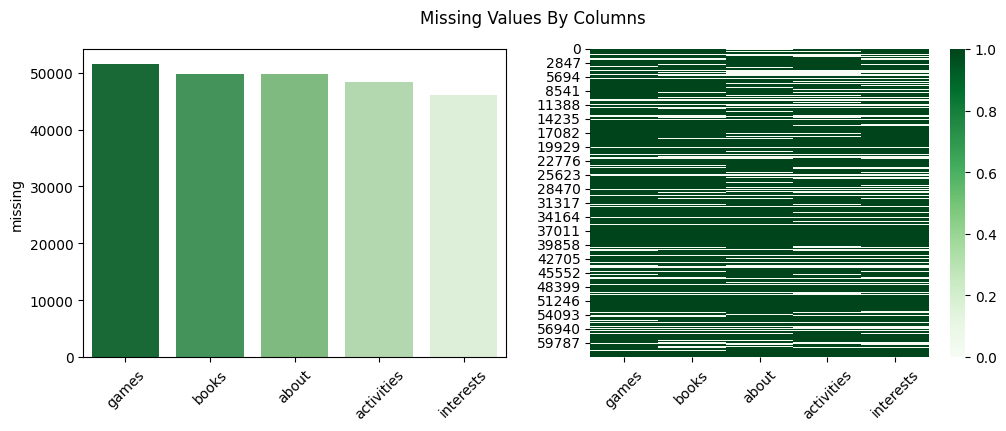

In [127]:
nan_vals = get_nulls_by_cols(df_copy)
display_stylized_df(nan_vals, True)
show_plots_of_nulls(df_copy, nan_vals)

## Unification Of Education Status

In [128]:
df_copy['education_status'].value_counts(dropna=False).sort_index()

Абитуриент                  2880
Абитуриентка                1630
Адъюнкт                       63
Аспирант                     683
Аспирантка                   356
Ассистент-стажёр              42
Выпускник (бакалавр)        1839
Выпускник (магистр)         2467
Выпускник (специалист)      9397
Выпускница (бакалавр)       2154
Выпускница (магистр)        2132
Выпускница (специалист)    12543
Доктор наук                 1646
Докторант                     91
Интерн                        88
Исследователь                 12
Кандидат наук               1184
Клинический ординатор         67
Соискатель                    39
Соискательница                43
Студент (бакалавр)          3289
Студент (магистр)           1288
Студент (специалист)        7615
Студентка (бакалавр)        3087
Студентка (магистр)          789
Студентка (специалист)      7205
Name: education_status, dtype: int64

In [129]:
def unify_education_status(x):
    if 'Абитуриентка' in x:
        return 'Абитуриент'
    elif 'Аспирантка' in x:
        return 'Аспирант'
    elif 'Выпускница' in x:
        return 'Выпускник'
    elif 'Студентка' in x:
        return 'Студент'
    elif 'Соискательница' in x:
        return 'Соискатель'
    else:
        return x

In [130]:
df_copy['education_status'] = df_copy['education_status'].apply(unify_education_status)
df_copy['education_status'].value_counts(dropna=False).sort_index()

Абитуриент                 4510
Адъюнкт                      63
Аспирант                   1039
Ассистент-стажёр             42
Выпускник                 16829
Выпускник (бакалавр)       1839
Выпускник (магистр)        2467
Выпускник (специалист)     9397
Доктор наук                1646
Докторант                    91
Интерн                       88
Исследователь                12
Кандидат наук              1184
Клинический ординатор        67
Соискатель                   82
Студент                   11081
Студент (бакалавр)         3289
Студент (магистр)          1288
Студент (специалист)       7615
Name: education_status, dtype: int64

In [131]:
df_copy.to_csv(home_dir+'data_cleaned3_unify_education_status.csv', index=False)

## Tokenization And Lemmatization

In [132]:
! pip install pymorphy2

In [133]:
import re

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

import pymorphy2

In [134]:
df_copy = pd.read_csv(home_dir+'data_cleaned3_unify_education_status.csv')

In [135]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
stopwords_ru = stopwords.words('russian')
morph = pymorphy2.MorphAnalyzer()

In [137]:
def clean_text(text: str) -> str:
    text = re.sub(r'((http|ftp)\S+)|[^a-zа-яё\s/-]|(-{2,})', '', text.lower())
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def remove_stopwords(tokens: list, stopwords=None) -> list:
    if not stopwords:
        return tokens

    stopwords = set(stopwords)
    tokens = [tok for tok in tokens if tok not in stopwords and len(tok)>2]

    return tokens

def text_preparation(text: str, to_str=True):
    text = clean_text(text)
    tokens = word_tokenize(text, language='russian')
    tokens = remove_stopwords(tokens, stopwords_ru)
    tokens = [morph.parse(tok)[0].normal_form for tok in tokens]

    return ' '.join(tokens) if to_str else tokens

def remove_special_chars(s):
    return s.replace('\r', '').replace('\n', '')

In [138]:
df_copy['faculty_name'] = df_copy['faculty_name'].apply(
    lambda x: x.replace('\r', '').replace('\n', '')
)

cols = [
    'about',
    'activities',
    'books',
    'games',
    'interests',
]

df_copy['combined'] = ['' for i in range(df_copy.shape[0])]

for col in cols:
    df_copy['combined'] += df_copy[col].fillna('').apply(text_preparation) + ' '

df_copy['combined'] = df_copy['combined'].apply(clean_text)

In [139]:
df_copy.sample(20)

,country,city,about,activities,books,games,interests,education_form,education_status,university_name,faculty_name,graduation,actual_university_name,combined
43958,Россия,Омск,NaN,NaN,NaN,NaN,NaN,Очное отделение,Выпускник,ОмГАУ,Землеустроительный,2005,ОмГАУ,
39878,Россия,Ульяновск,NaN,NaN,NaN,NaN,NaN,Очное отделение,Выпускник,УлГПУ им. И. Н. Ульянова,Физико-математический,2007,УлГПУ им. И. Н. Ульянова,
13271,Танзания,Arusha,NaN,NaN,NaN,NaN,NaN,Очное отделение,Выпускник (магистр),"ХНУ (бывш. ТИБО, ТУП)",Телекоммуникационых систем,1995,"ХНУ (бывш. ТИБО, ТУП)",
16391,Украина,Коломыя,NaN,Якісний друк за доступними цінами! Є можливіст...,NaN,NaN,Створення поліграфічного продукту починається ...,Заочное отделение,Выпускник,КНЭУ им. В. Гетьмана (КИНХ им. Д. С. Коротченко),Экономический,0,КНЭУ им. В. Гетьмана (КИНХ им. Д. С. Коротченко),яксния друка доступний цнами можливсть вдправк...
36430,Украина,Севастополь,NaN,NaN,NaN,NaN,NaN,Очное отделение,Абитуриент,СевГУ,Технологии и автоматизации машиноприборостроен...,2012,СевГУ,
53268,Россия,Челябинск,NaN,NaN,NaN,NaN,NaN,Очное отделение,Студент (специалист),ЧФ Университета РИО (бывш. УРАО ЧФ),Экономики и бизнеса,0,ЧФ Университета РИО (бывш. УРАО ЧФ),
6215,Россия,Москва,)))))))))))))))))))))))))))))))))),)))),))))))))))))))),))))))))))))))))))),))))),Очное отделение,Студент (специалист),МГУ,Высшая школа управления и инноваций,2010,МГУ,
26490,Россия,Екатеринбург,NaN,NaN,NaN,NaN,NaN,Очное отделение,Выпускник,ЕГТИ\r\n,Актерского мастерства,0,ЕГТИ\r\n,
39297,Россия,Ейск,"Я никогда не была идеальной, начиная от внешно...",NaN,NaN,NaN,NaN,Заочное отделение,Студент (специалист),КНУ (КТУ),Геолого-экологический (Геолого-обогатительный),2013,КНУ (КТУ),идеальный начинать внешность заканчивать харак...
33069,Россия,Екатеринбург,Давно мы Лёню не видали\nУж Леонид у нас один....,Живу и учусь жить :),С. Алексеев - Аз Бога Ведаю\nОшо - Осознанност...,"Элиас, Мафия, Волейбол, твистер, догонялки с к...","Саморазвитие и развитие, во многих направления...",Очное отделение,Выпускник (специалист),РГППУ,Электроэнергетический,1998,РГППУ,давно лёня видать леонид назвать это значит ль...


In [140]:
df_copy.to_csv(home_dir+'data_cleaned4_combined.csv', index=False)